Dataset: https://www.kaggle.com/datasets/diegosilvadefrana/fisical-activity-dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib import rc

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time
from sklearn.model_selection import GridSearchCV
import os
import zipfile
!pip install gdown==4.6.0
import gdown
!pip install shap --upgrade
import shap
import glob
from sklearn.impute import SimpleImputer
import xgboost as xgb
import warnings

warnings.filterwarnings("ignore")

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/3a/ee/f77fd0c99639579ec063b06b5ca310f2b9f496cedd8a4f633ac5d97a1473/shap-0.44.1-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.44.0
    Uninstalling shap-0.44.0:
      Successfully uninstalled shap-0.44.0


In [3]:
xgb.__version__

'2.0.3'

In [4]:
url = 'https://drive.google.com/uc?id=1NHg8HxPNmCsVpIuDFMQrzFpZIpC6bu5f'
output = '/content/dataset/'
gdown.download(url, output, quiet=False)

extract_path = '/content/dataset/'

with zipfile.ZipFile('/content/dataset/Physical-Activity-Prediction-Dataset-13class.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_path)


os.remove('/content/dataset/Physical-Activity-Prediction-Dataset-13class.zip')


Downloading...
From: https://drive.google.com/uc?id=1NHg8HxPNmCsVpIuDFMQrzFpZIpC6bu5f
To: /content/dataset/Physical-Activity-Prediction-Dataset-13class.zip
100%|██████████| 312M/312M [00:02<00:00, 119MB/s]  


In [5]:
csv_directory = '/content/dataset/dataset2.csv'
df = pd.read_csv(csv_directory)
df.head(10)

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,transient activities,104.0,30.0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.6806,...,9.65918,-1.65569,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1
1,transient activities,104.0,30.0,2.18837,8.56560,3.66179,-0.024413,0.047759,0.006474,14.8991,...,9.69370,-1.57902,-0.215687,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1
2,transient activities,104.0,30.0,2.37357,8.60107,3.54898,-0.057976,0.032574,-0.006988,14.2420,...,9.58944,-1.73276,0.092914,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1
3,transient activities,104.0,30.0,2.07473,8.52853,3.66021,-0.002352,0.032810,-0.003747,14.8908,...,9.58814,-1.77040,0.054545,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1
4,transient activities,104.0,30.0,2.22936,8.83122,3.70000,0.012269,0.018305,-0.053325,15.5612,...,9.69771,-1.65625,-0.060809,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1
5,transient activities,104.0,30.0,2.29959,8.82929,3.54710,0.003238,0.012260,-0.054474,15.4565,...,9.69551,-1.65560,-0.138014,-0.006089,-0.016024,0.001050,-60.2954,-38.8778,-58.3977,1
6,transient activities,104.0,30.0,2.33738,8.82900,3.54767,-0.023704,-0.031518,-0.047883,15.1206,...,9.73474,-1.73242,-0.059956,-0.031973,-0.053934,0.015594,-60.6307,-38.8676,-58.2711,1
7,transient activities,104.0,30.0,2.37142,9.05500,3.39347,0.019069,-0.022004,-0.033647,14.8919,...,9.70231,-1.61956,0.093369,-0.019643,-0.039937,-0.000785,-60.5171,-38.9819,-58.2733,1
8,transient activities,104.0,30.0,2.33951,9.13251,3.54668,0.024840,-0.053054,-0.011178,14.5769,...,9.73903,-1.54354,0.054684,0.013747,-0.010042,0.017701,-61.2916,-39.6182,-58.1499,1
9,transient activities,104.0,30.0,2.25966,9.09415,3.43015,0.007627,-0.057759,-0.019075,14.9037,...,9.73624,-1.65680,-0.021820,0.007649,-0.013923,0.014498,-60.8509,-39.0821,-58.1478,1


In [7]:
df = df.dropna()
X = df.drop('activityID', axis=1)  # Features
X = df.apply(pd.to_numeric, errors='coerce')
y = df['activityID']  # Labels
df = df.dropna(subset=['activityID'])

activityID
transient activities    927529
walking                 238761
ironing                 238690
lying                   192523
standing                189931
Nordic walking          188107
sitting                 185188
vacuum cleaning         175353
cycling                 164600
ascending stairs        117216
descending stairs       104944
running                  98199
rope jumping             42969
Name: count, dtype: int64


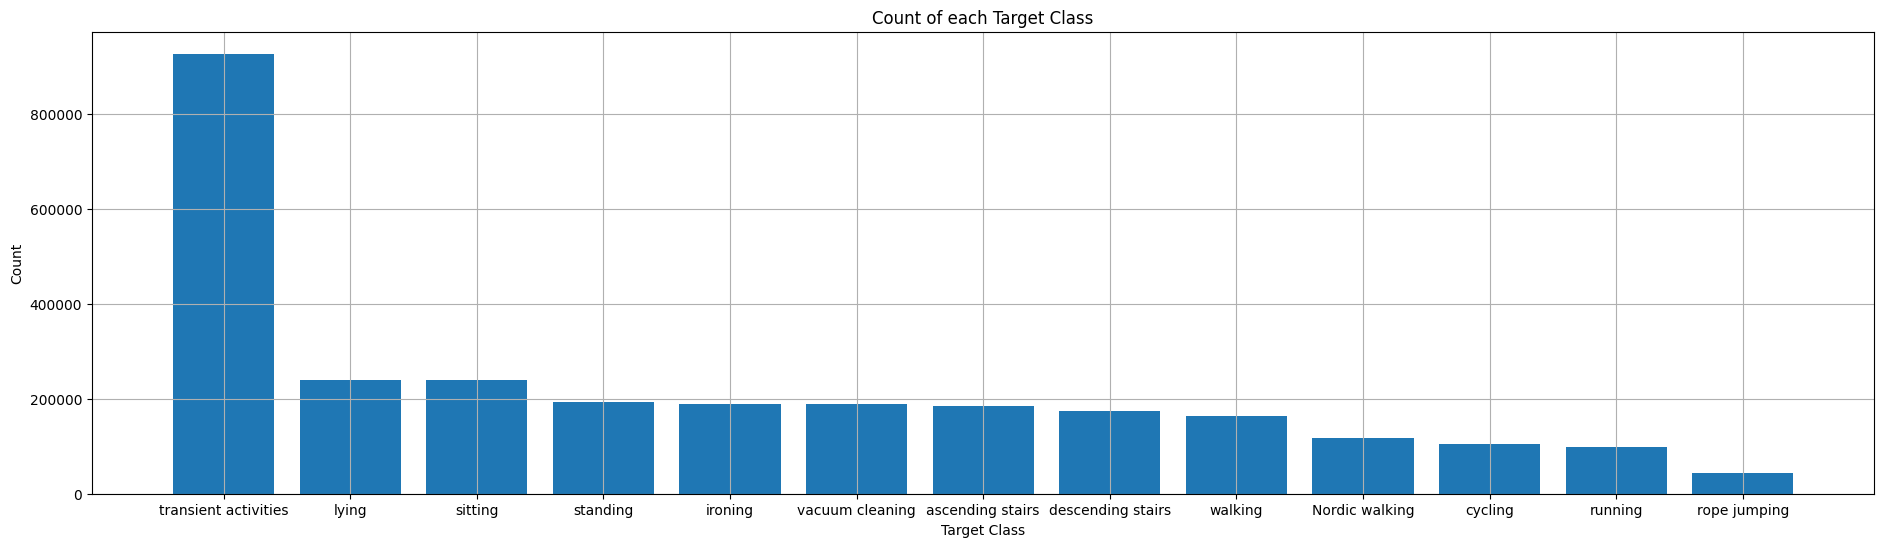

In [8]:
rcParams['figure.figsize'] = 23,6
plt.bar(df['activityID'].unique(), df['activityID'].value_counts())
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Count of each Target Class')
plt.grid()
plt.savefig("target_class2.png")
print(df['activityID'].value_counts())

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#visualize the columns
df.columns

Index(['activityID', 'heart_rate', 'hand temperature (°C)',
       'hand acceleration X ±16g', 'hand acceleration Y ±16g',
       'hand acceleration Z ±16g', 'hand gyroscope X', 'hand gyroscope Y',
       'hand gyroscope Z', 'hand magnetometer X', 'hand magnetometer Y',
       'hand magnetometer Z', 'chest temperature (°C)',
       'chest acceleration X ±16g', 'chest acceleration Y ±16g',
       'chest acceleration Z ±16g', 'chest gyroscope X', 'chest gyroscope Y',
       'chest gyroscope Z', 'chest magnetometer X', 'chest magnetometer Y',
       'chest magnetometer Z', 'ankle temperature (°C)',
       'ankle acceleration X ±16g', 'ankle acceleration Y ±16g',
       'ankle acceleration Z ±16g', 'ankle gyroscope X', 'ankle gyroscope Y',
       'ankle gyroscope Z', 'ankle magnetometer X', 'ankle magnetometer Y',
       'ankle magnetometer Z', 'PeopleId'],
      dtype='object')

In [11]:
#visualize the distribution of the target values in the dataset
print(len(y.value_counts()))
y.value_counts()

13


activityID
transient activities    927529
walking                 238761
ironing                 238690
lying                   192523
standing                189931
Nordic walking          188107
sitting                 185188
vacuum cleaning         175353
cycling                 164600
ascending stairs        117216
descending stairs       104944
running                  98199
rope jumping             42969
Name: count, dtype: int64

Training Time (in seconds): 56.222696802
Accuracy: 0.8984832455193942
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     37574
           1       0.87      0.59      0.70     23625
           2       0.94      0.94      0.94     32783
           3       0.89      0.55      0.68     21081
           4       0.93      0.97      0.95     47880
           5       1.00      0.97      0.98     38523
           6       0.97      0.91      0.94      8703
           7       0.98      0.90      0.94     19641
           8       0.99      0.95      0.97     37004
           9       0.91      0.94      0.93     37880
          10       0.83      0.92      0.87    185313
          11       0.93      0.83      0.88     34872
          12       0.88      0.92      0.90     47923

    accuracy                           0.90    572802
   macro avg       0.93      0.87      0.89    572802
weighted avg       0.90      0.90      0.

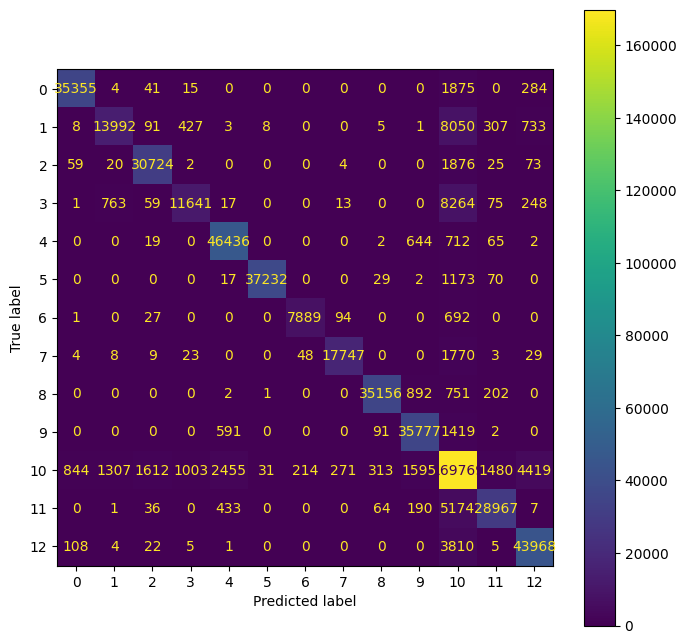

In [12]:
start = time.process_time()

#Use LabelEncoder to transform target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

#Create an XGBoost classifier
xgb_clf = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, objective='multi:softmax',
    num_class=len(set(y_train)), random_state=42, tree_method='hist', device='cuda')


xgb_clf.fit(X_train, y_train_encoded)
y_pred_encoded = xgb_clf.predict(X_test)

#Transform predictions back to original classes
y_pred = label_encoder.inverse_transform(y_pred_encoded)

end = time.process_time()
print("Training Time (in seconds):", end - start)

y_test_encoded = label_encoder.transform(y_test)

#Confusion matrix
f, ax = plt.subplots(1, 1, figsize=(8, 8))
disp = metrics.ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test, y_test_encoded, ax=ax)

#Visualize the metrics of the model
print("Accuracy:", metrics.accuracy_score(y_test_encoded, y_pred_encoded))
print("Classification Report:")
print(metrics.classification_report(y_test_encoded, y_pred_encoded))

disp.figure_.savefig("xgb_conf.png")

In [13]:
background_data_summary = shap.sample(X_train, 10)

feature_names = X_train.columns.tolist()

#Create a wrapper function for prediction without feature names
predict_function = lambda x: xgb_clf.predict(x)

#Use the wrapper function in the explainer
explainer = shap.KernelExplainer(predict_function, background_data_summary, feature_names=feature_names, approximate=True)

#Downsample X_test consistently for both SHAP computation and summary plot
downsampled_X_test = X_test.sample(frac=0.01, random_state=42)

#Ensure the downsampled data has the same columns and order as the training data
downsampled_X_test = downsampled_X_test[X_train.columns]


#Compute SHAP values for the downsampled X_test
shap_values = explainer.shap_values(downsampled_X_test)


  0%|          | 0/5728 [00:00<?, ?it/s]

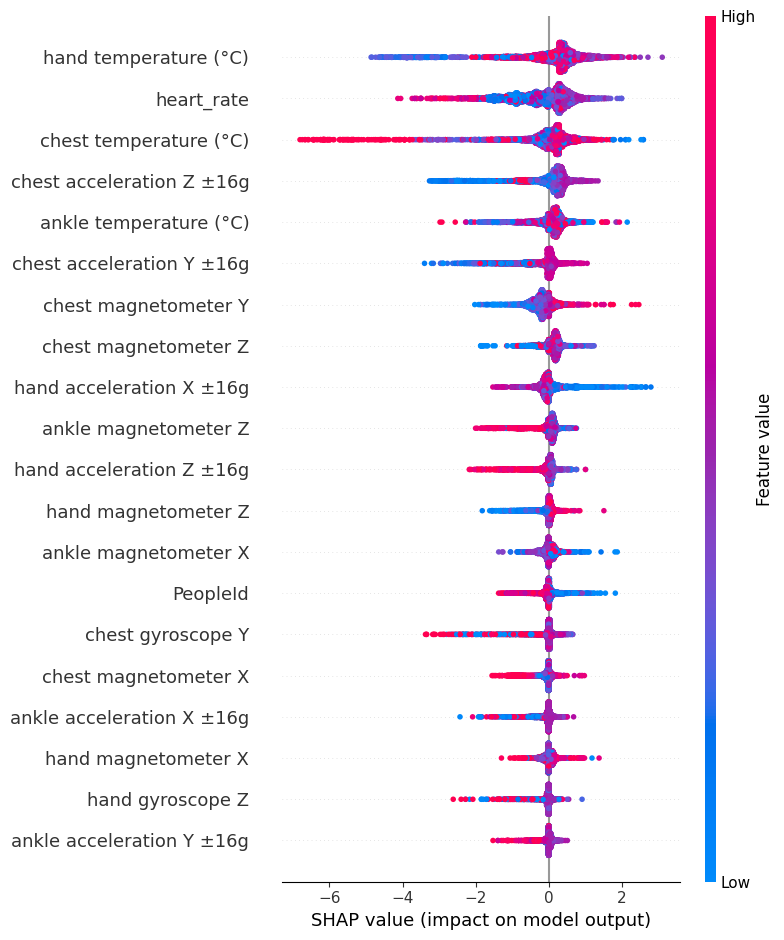

In [14]:
shap.summary_plot(shap_values, downsampled_X_test)

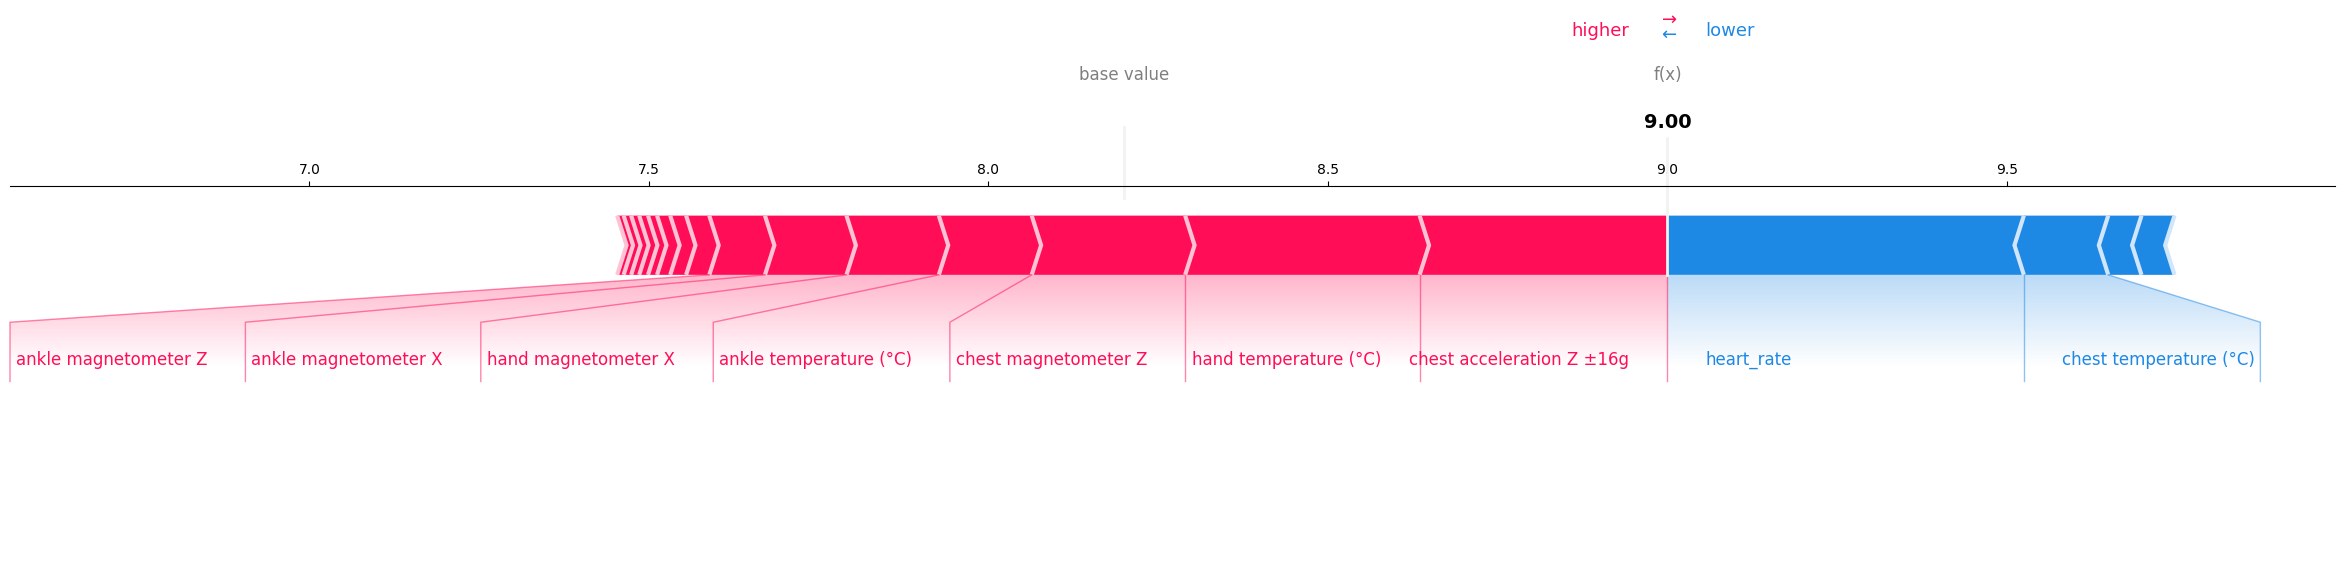

In [16]:
shap.initjs()
fig, ax = plt.subplots()
force_plot = shap.force_plot(explainer.expected_value, shap_values[88], feature_names=df.columns, matplotlib=True, show=False, figsize=(30,5))
fig.savefig('force_plot.png', bbox_inches='tight')
force_plot

These next 2 pieces of code automatically seperates the features for leader and follower according to the shapley values of each feature based on a threshold given by us.

In [17]:
#taking the average of Shap values
shaps = np.mean(shap_values, axis=0)
shaps

array([ 0.00000000e+00, -1.74107504e-01,  1.25411133e-01,  1.38057276e-02,
       -5.56285448e-03, -5.52738568e-02, -1.04428521e-05, -8.19327407e-05,
       -5.18163996e-02,  9.79019097e-03, -1.18228438e-02, -4.71112506e-02,
       -6.27737057e-02,  2.66306195e-04, -1.85232728e-01,  3.47930453e-02,
       -1.55851421e-02, -4.66251267e-02, -3.55255303e-03, -6.98103953e-02,
       -1.68789744e-01,  1.08453482e-01,  7.28180529e-02, -7.03759708e-02,
       -1.90144349e-02, -5.49482187e-04, -8.71610978e-03, -1.71467847e-02,
       -1.59822865e-02,  1.41897277e-02,  3.16769008e-03, -1.53453665e-02,
       -7.46429912e-04])

In [19]:
#Divide features into 2 sets according to a threshold value based on average shap values
column_names = X.columns
fset_1 = pd.DataFrame()
fset_2 = pd.DataFrame()
threshold = 0

for feature, shap_value in zip(column_names, shaps):
    if shap_value > threshold:
      fset_1[feature] = X[feature]
    if shap_value <= threshold:
      fset_2[feature] = X[feature]

In [20]:
num_classes = 13
all_features = ['activityID', 'heart_rate', 'hand temperature (°C)',
       'hand acceleration X ±16g', 'hand acceleration Y ±16g',
       'hand acceleration Z ±16g', 'hand gyroscope X', 'hand gyroscope Y',
       'hand gyroscope Z', 'hand magnetometer X', 'hand magnetometer Y',
       'hand magnetometer Z', 'chest temperature (°C)',
       'chest acceleration X ±16g', 'chest acceleration Y ±16g',
       'chest acceleration Z ±16g', 'chest gyroscope X', 'chest gyroscope Y',
       'chest gyroscope Z', 'chest magnetometer X', 'chest magnetometer Y',
       'chest magnetometer Z', 'ankle temperature (°C)',
       'ankle acceleration X ±16g', 'ankle acceleration Y ±16g',
       'ankle acceleration Z ±16g', 'ankle gyroscope X', 'ankle gyroscope Y',
       'ankle gyroscope Z', 'ankle magnetometer X', 'ankle magnetometer Y',
       'ankle magnetometer Z', 'PeopleId']


leader_features = ['hand temperature (°C)','heart_rate','chest temperature (°C)','ankle temperature (°C)','chest acceleration Z ±16g','chest acceleration Y ±16g','chest magnetometer Y',
       'chest magnetometer Z','hand acceleration X ±16g','ankle magnetometer Z','hand acceleration Z ±16g','hand magnetometer Z','ankle magnetometer X', 'chest magnetometer X','chest gyroscope Y',
                   'ankle acceleration X ±16g','hand magnetometer X','hand gyroscope Z','ankle acceleration Y ±16g']

follower_features = ['hand acceleration Y ±16g',
        'hand gyroscope X', 'hand gyroscope Y',
       'hand magnetometer Y',
       'chest acceleration X ±16g',
       'chest gyroscope X','chest gyroscope Z',
       'ankle acceleration Z ±16g', 'ankle gyroscope X', 'ankle gyroscope Y',
       'ankle gyroscope Z', 'ankle magnetometer Y',
       'PeopleId']

leader_data = df[leader_features + ['activityID']].copy()

#leader_data_no_label = df[leader_features].copy()
leader_data_no_label = fset_1.copy()

#Split leader into training and testing sets
#leader_train, leader_test = train_test_split(leader_data, test_size=0.2, random_state=42)
X_leader_train, X_leader_test, y_leader_train, y_leader_test = train_test_split(fset_1, y, test_size=0.2, random_state=42)

#Separate features and labels for leader
#X_leader_train = leader_train[leader_features]
#y_leader_train = leader_train['activityID']
#X_leader_test = leader_test[leader_features]
#y_leader_test = leader_test['activityID']

#Check if unique classes match the expected classes
expected_classes = list(range(num_classes))
if set(y_leader_train.unique()) != set(expected_classes):
    # If not, re-map the classes to match the expected classes
    class_mapping = {cls: idx for idx, cls in enumerate(y_leader_train.unique())}
    y_leader_train = y_leader_train.map(class_mapping)
    y_leader_test = y_leader_test.map(class_mapping)

#Train XGBoost model for leader using only the specified features
leader_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, objective='multi:softmax',
    num_class=len(set(y_train)), random_state=42, tree_method='hist', device='cuda')


leader_model.fit(X_leader_train, y_leader_train)

#Make predictions using the leader's model for the leader's test set
leader_predictions_test = leader_model.predict(X_leader_test)
leader_predictions = leader_model.predict(leader_data_no_label)          #new column of predictions for the follower model

#Evaluate the leader's accuracy
accuracy_leader = accuracy_score(y_leader_test, leader_predictions_test)
print(f'Leader Accuracy: {accuracy_leader}')

Leader Accuracy: 0.803267097531084


In [21]:
print(len(all_features))
print(len(leader_features))
print(len(follower_features))
print(len(fset_1.columns))
print(len(fset_2.columns))

33
19
13
9
24


In [22]:
follower_data = df[follower_features + ['activityID']].copy()
follower_data['predicted_leader'] = leader_predictions         #now the follower data contains the features that leader did not use + predictions of the leader

follower_features = ['hand acceleration Y ±16g',
        'hand gyroscope X', 'hand gyroscope Y',
       'hand magnetometer Y',
       'chest acceleration X ±16g',
       'chest gyroscope X','chest gyroscope Z',
       'ankle acceleration Z ±16g', 'ankle gyroscope X', 'ankle gyroscope Y',
       'ankle gyroscope Z', 'ankle magnetometer Y',
       'PeopleId','predicted_leader'] #new feature (predicted_leader)

#SAME PROCEDURE FOLLOWED ALSO FOR THE LEADER, ONLY THE FEATURES CHANGE


#follower_train, follower_test = train_test_split(follower_data, test_size=0.2, random_state=42)
fset_2['predicted_leader'] = leader_predictions
X_follower_train, X_follower_test, y_follower_train, y_follower_test = train_test_split(fset_2, y, test_size=0.2, random_state=42)


#Separate features and labels for follower
#X_follower_train = follower_train[follower_features]
#y_follower_train = follower_train['activityID']
#X_follower_test = follower_test[follower_features]
#y_follower_test = follower_test['activityID']

#Check if unique classes match the expected classes
expected_classes = list(range(num_classes))
if set(y_follower_train.unique()) != set(expected_classes):
    # If not, re-map the classes to match the expected classes
    class_mapping = {cls: idx for idx, cls in enumerate(y_follower_train.unique())}
    y_follower_train = y_follower_train.map(class_mapping)
    y_follower_test = y_follower_test.map(class_mapping)

#Train XGBoost model for follower using only the specified features
follower_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, objective='multi:softmax',
    num_class=len(set(y_train)), random_state=42, tree_method='hist', device='cuda')


follower_model.fit(X_follower_train, y_follower_train)

#Make predictions using the follower's model for the follower's test set
follower_predictions_test = follower_model.predict(X_follower_test)

#Evaluate the follower's accuracy
accuracy_follower = accuracy_score(y_follower_test, follower_predictions_test)
print(f'Follower Accuracy: {accuracy_follower}')

Follower Accuracy: 0.8715821522969542
